In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cifar = keras.datasets.cifar10
(X_train,y_train),(X_test,y_test) = cifar.load_data()

In [3]:
names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train[0]

array([6], dtype=uint8)

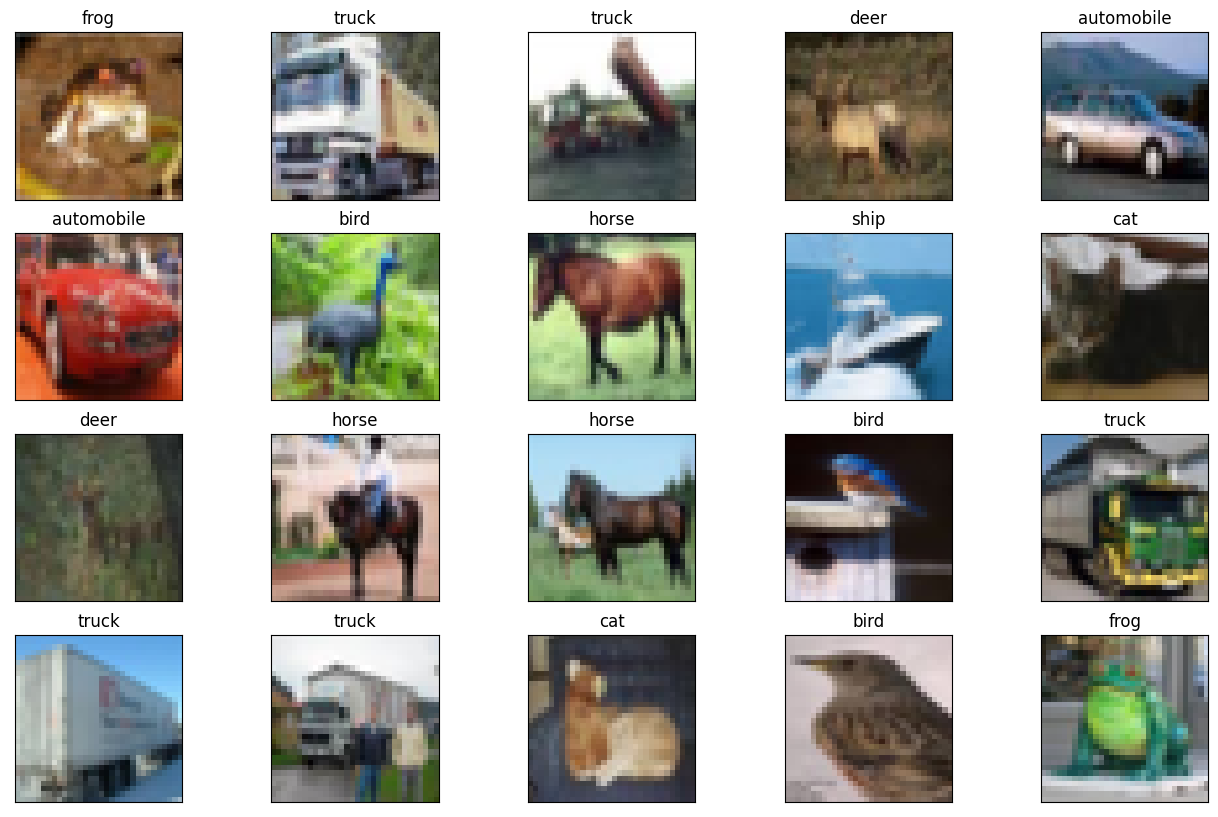

In [7]:
plt.figure(figsize=(16, 10))

for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.title(names[int(y_train[i])])  
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap='gray')

plt.show()

In [8]:
X_train[0].shape

(32, 32, 3)

In [9]:
X_train=X_train/255
X_test=X_test/255

In [10]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
     

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [12]:
model.fit(X_train,y_train,epochs=35)

Epoch 1/35
1563/1563 [==============================] - 17s 10ms/step - loss: 1.8558 - accuracy: 0.3296
Epoch 2/35
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6852 - accuracy: 0.3923
Epoch 3/35
1563/1563 [==============================] - 15s 10ms/step - loss: 1.6177 - accuracy: 0.4220
Epoch 4/35
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5749 - accuracy: 0.4353
Epoch 5/35
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5435 - accuracy: 0.4460
Epoch 6/35
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5183 - accuracy: 0.4543
Epoch 7/35
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4989 - accuracy: 0.4615
Epoch 8/35
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4778 - accuracy: 0.4695
Epoch 9/35
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4594 - accuracy: 0.4767
Epoch 10/35
1563/1563 [==============================] - 16s 10m

In [13]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 1.4569 - accuracy: 0.4841


[1.4569035768508911, 0.48410001397132874]

In [14]:
import numpy as np
predicted = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [15]:
predicted_labels = [np.argmax(i) for i in predicted]

In [29]:
print('Actual:' , names[int(y_test[1])])
print('Predicted:' , names[int(predicted_labels[1])])


Actual: ship
Predicted: ship


In [16]:
cm = tf.math.confusion_matrix(labels=y_test ,predictions=predicted_labels)

Text(170.72222222222223, 0.5, 'Actual')

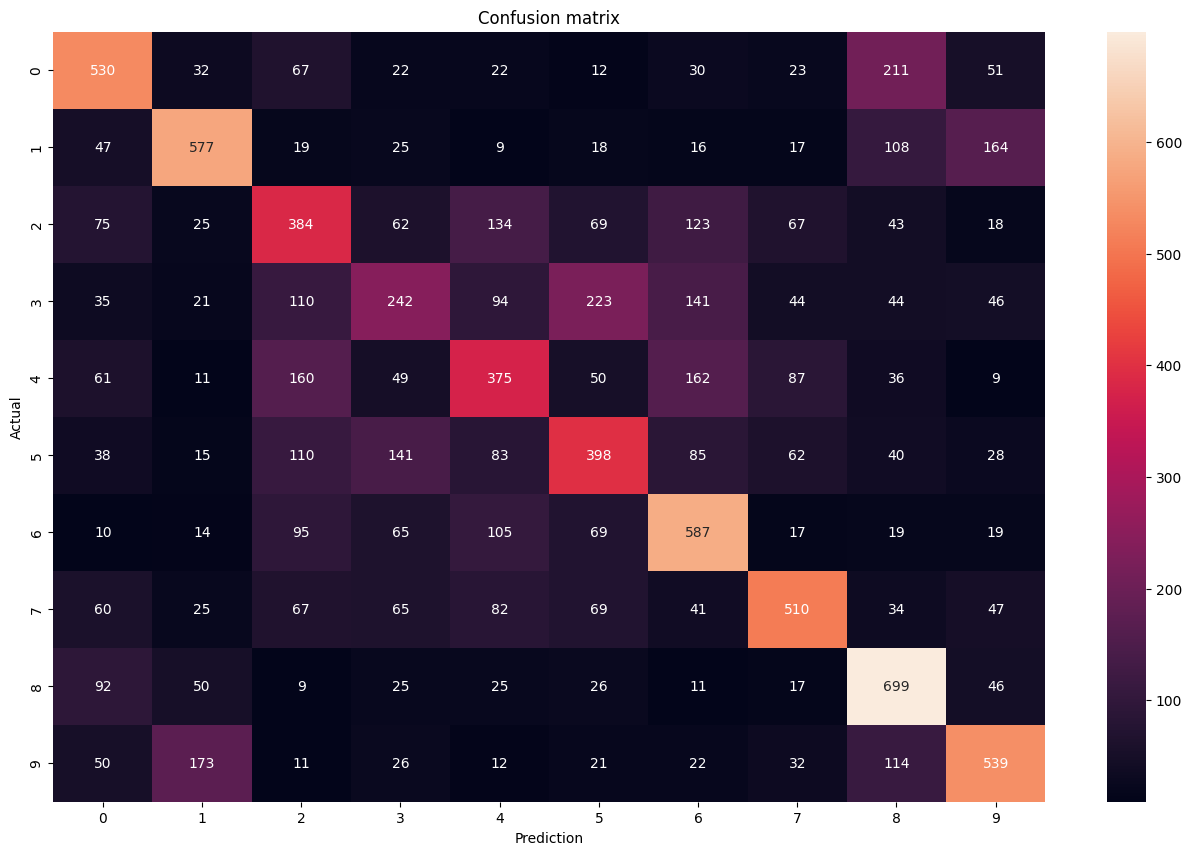

In [17]:
plt.figure(figsize=(16,10))
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')